### Задание 1
Создадим функцию описывающую распределение плотности вероятности для нормального распределения случайной величины

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def plot_normal_distribution(mu, sigma):

    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(
        x,
        1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-((x - mu) ** 2) / (2 * sigma**2)),
        linewidth=2,
        label=f"{mu = }; {sigma = }",
    )
    plt.grid(True)
    plt.legend()
    plt.title("Normal Distribution")


Построим графики с параметрами:
- $M = 10, \sigma = 2$;
- $M = 10, \sigma = 1$;
- $M = 10, \sigma = 1/2$;
- $M = 12, \sigma = 1$.

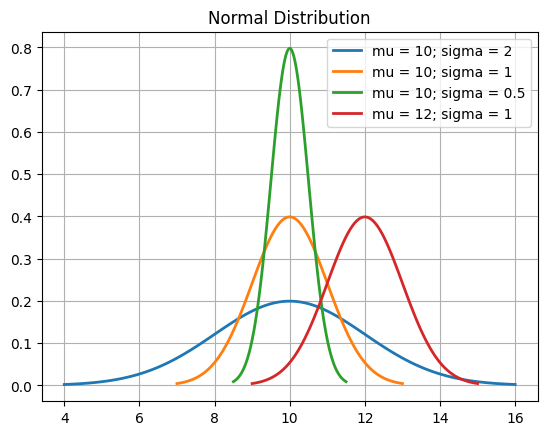

In [2]:
values = [[10, 2], [10, 1], [10, 0.5], [12, 1]]
for i in range(len(values)):
    plot_normal_distribution(values[i][0], values[i][1])
plt.show()


### Задание 2
Создадим функцию распределения для нормального закона

In [3]:
def erf(x):
    sign = np.sign(x)
    x = np.abs(x)

    # constants
    a1 = 0.254829592
    a2 = -0.284496736
    a3 = 1.421413741
    a4 = -1.453152027
    a5 = 1.061405429
    p = 0.3275911

    # A&S formula 7.1.26
    t = 1.0 / (1.0 + p * x)
    y = 1.0 - (((((a5 * t + a4) * t) + a3) * t + a2) * t + a1) * t * np.exp(-x * x)
    return sign * y


Построим график нормального распределения с параметрами $M = 10, \sigma = 2$ на интервале от 0 до 20

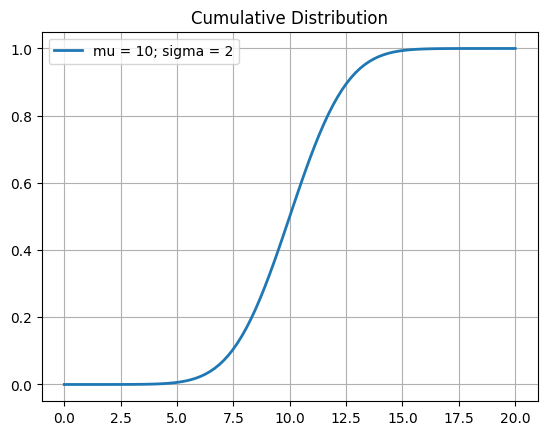

In [4]:
def plot_cumulative_distribution(mu, sigma):
    x = np.linspace(0, 20, 100)
    plt.plot(
        x,
        0.5 * (1 + erf((x - mu) / (sigma * np.sqrt(2)))),
        linewidth=2,
        label=f"{mu = }; {sigma = }",
    )
    plt.grid(True)
    plt.legend()
    plt.title("Cumulative Distribution")


plot_cumulative_distribution(10, 2)
plt.show()


### Задание 3

Используя алгоритм зиккурат проведем моделирования нормально закона распределения

In [5]:
class ZigguratAlgorithm:
    def __init__(self, sample, regions, nbins, mu, sigma, max_i=10):
        self.sample = sample
        self.regions = regions
        self.nbins = nbins
        self.max_i = max_i

        self.mu = mu
        self.sigma = sigma

    def ziggurat(self):

        X_0 = 0
        limit = 20
        rectangle_size = 1 / (self.regions)
        X = np.array([])
        dX = 0.01
        current_x = X_0
        current_area, rectangle_length = 0, 0
        Z = np.ones(self.sample)

        while current_x < limit:
            rectangle_length = rectangle_length + dX
            current_area = (
                (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (current_x**2))
                - (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (rectangle_length**2))
            ) * rectangle_length

            if current_area > rectangle_size:
                X = np.append(X, rectangle_length)
                current_x = rectangle_length

        Y = 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * (X**2))

        for j in range(self.sample):
            num = 0
            while (Z[j] == 1) and num < self.max_i:
                i = np.random.randint(0, len(X))
                u0 = np.random.uniform(-1, 1)
                u1 = np.random.uniform(0, 1)
                x = u0 * X[i]
                if abs(x) < X[i - 1]:
                    Z[j] = x
                else:
                    y = Y[i] + u1 * (Y[i - 1] - Y[i])
                    point = 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * (x**2))
                    if y < point:
                        Z[j] = x
                num = num + 1

        return Z

    def plot_matplotlib(self):
        data = self.ziggurat()
        data = data * self.sigma + self.mu
        plt.hist(data, bins=self.nbins, density=True)
        plt.grid(True)

        plt.title("Probability Density Function")

    def plot_matplotlib_in_range(self, start, end):
        data = self.ziggurat()
        data = data * self.sigma + self.mu
        plt.hist(data, bins=self.nbins, density=True)
        plt.grid(True)
        plt.xlim(start, end)
        plt.title("Probability Density Function")


Построим графики для числа экспериментов $N = 10^3, 10^4, 10^5, 10^6$

N = 1e+03


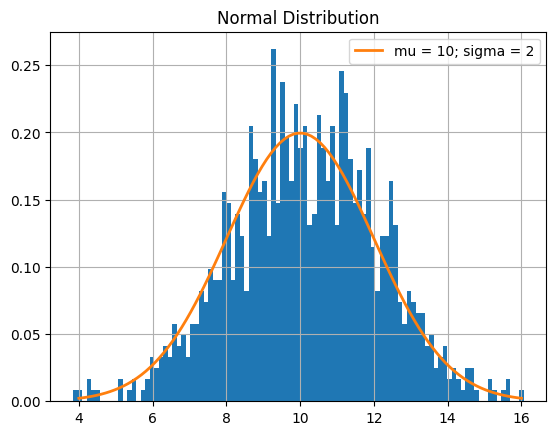

N = 1e+04


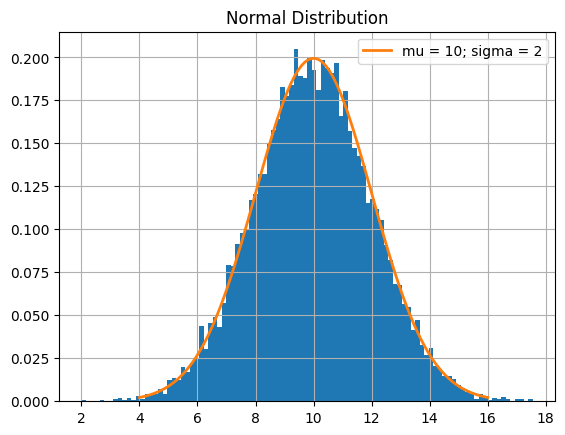

N = 1e+05


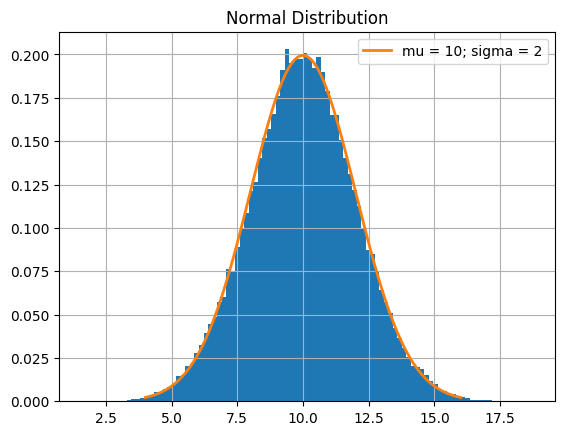

N = 1e+06


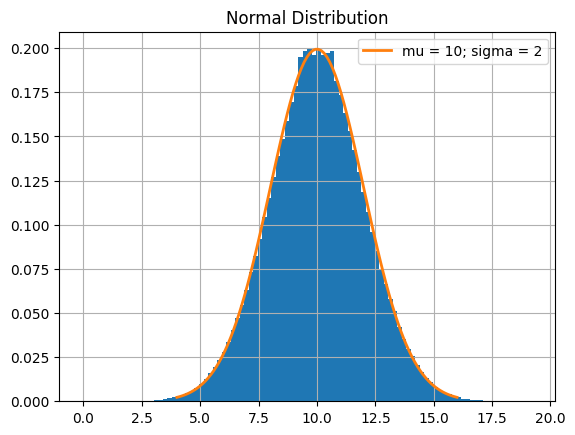

In [16]:
N = [10**3, 10**4, 10**5, 10**6]


for i in range(len(N)):
    mu, sigma = 10, 2

    z = ZigguratAlgorithm(N[i], regions = 100, nbins = 100, mu = mu, sigma = sigma)
    z.plot_matplotlib()
    plot_normal_distribution(mu, sigma)
    print(f"N = {N[i]:.0e}")
    plt.show()

### Задание 4

N = 1e+02


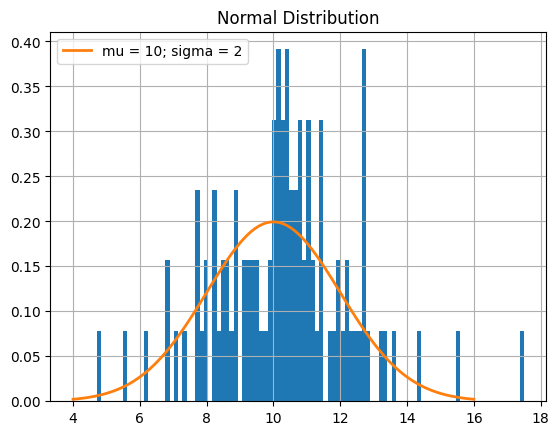

N = 1e+03


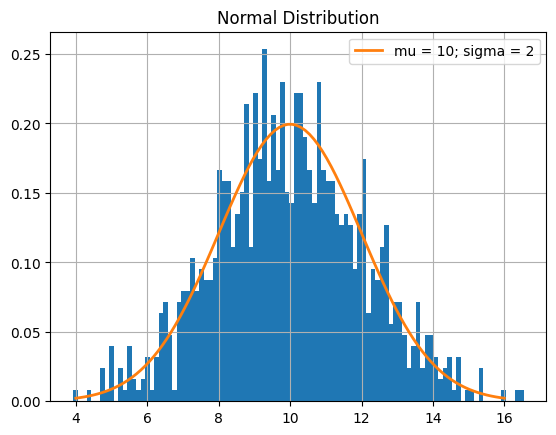

N = 1e+04


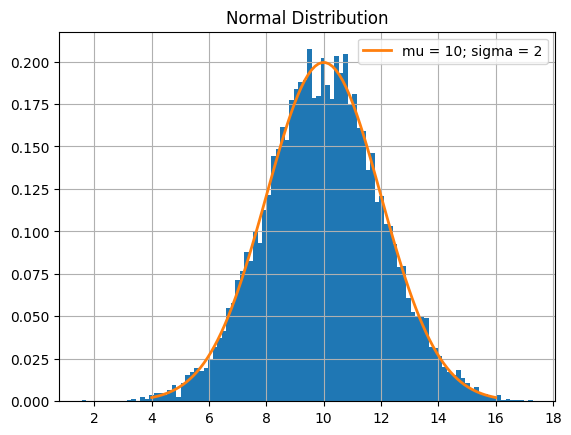

N = 1e+05


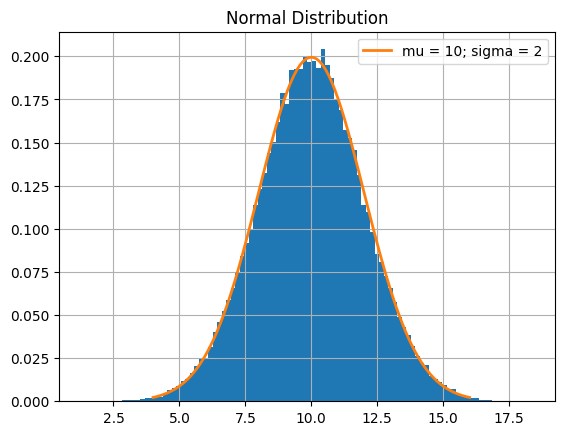

In [17]:
N = [10**2, 10**3, 10**4, 10**5]


for i in range(len(N)):
    mu, sigma = 10, 2

    z = ZigguratAlgorithm(N[i], regions = 100, nbins = 100, mu = mu, sigma = sigma)
    z.plot_matplotlib()
    plot_normal_distribution(mu, sigma)
    print(f"N = {N[i]:.0e}")
    plt.show()

### Задание 5
Рассчитаем среднеквадратичную погрешность между экспериментальным и теоретическим

N = 100, RMSD = 1.864572438347282
N = 1000, RMSD = 1.9264294360284697
N = 10000, RMSD = 2.009223354939806
N = 100000, RMSD = 2.0206357112371416


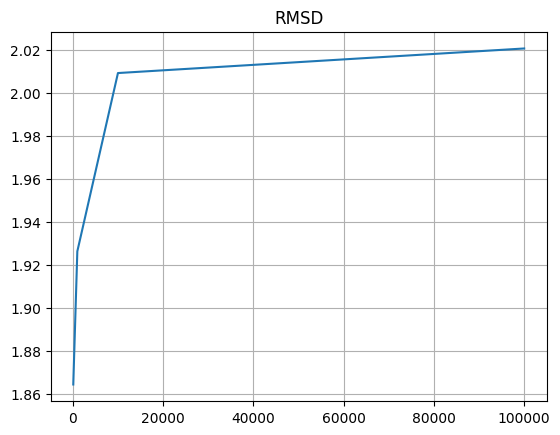

In [18]:
N = [10**2, 10**3, 10**4, 10**5]

def root_mean_square_deviation(data, mu):
    return np.sqrt(np.sum((data - mu)**2)/len(data))

rmsd = []
for i in range(len(N)):
    mu, sigma = 10, 2

    z = ZigguratAlgorithm(N[i], regions = 100, nbins = 100, mu = mu, sigma = sigma)
    data = z.ziggurat()
    data = data * sigma + mu

    rmsd.append(root_mean_square_deviation(data, mu))
    print(f'N = {N[i]}, RMSD = {rmsd[-1]}')


plt.plot(N, rmsd)
plt.grid(True)
plt.title("RMSD")
plt.show()

